# **MRI HARMONIZATION**


## CONTENTS
- [Mri basics](#mri-basics)
- [WHAT ? - is Data Harmonization](#what----is-data-harmonization)
- [WHY  ? - do we need for Data Harmonization](#why----do-we-need-data-harmonization)
- [HOW  ? - to perform Data Harmonization](#how----to-perform-data-harmonization)
- [NIfTI (Neuroimaging Informatics Technology Initiative)](#n-i-f-t-i-neuroimaging-informatics-technology-initiative)
- [About the Dataset](#about-the-dataset)
- [Performing Harmonization using Python]()
- [References]()

# MRI BASICS
### 1.Principle: 
At the core of MRI is the behavior of hydrogen nuclei (protons) within the body when exposed to a strong magnetic field and radiofrequency (RF) waves. When placed in a strong magnetic field, the protons align themselves parallel or anti-parallel to the field. When RF pulses are applied, the protons absorb energy and flip their alignment. When the RF pulse is turned off, they release this energy, emitting radiofrequency signals that can be detected and processed into images.
### 2.Magnetic Field: 
MRI machines generate a strong and constant magnetic field, usually measured in units of tesla (T). Most clinical MRI scanners operate at 1.5T or 3T, while research-grade scanners can go up to 7T or higher. The stronger the magnetic field, the higher the image resolution.
### 3.Effect of Magnetic Field on Image Quality:
With the higher magnetic field, the signal being read by the machine and transmitted to the computer is increased. This will result in a clear and less noisy image

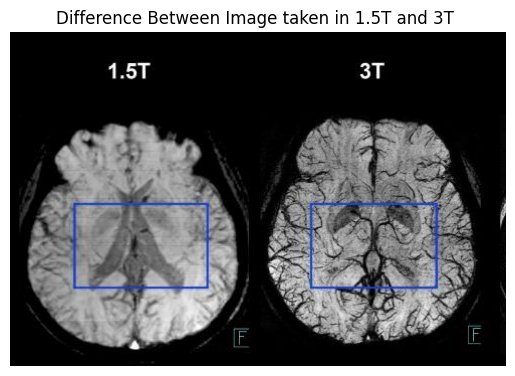

In [1]:
# Showing the Image that depicts the difference between 1.5T and 3T scan result
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("3T-vs-1.5-MRI.png")
plt.axis("off")
plt.title("Difference Between Image taken in 1.5T and 3T ")
plt.imshow(img)

# **WHAT ?** - is Data Harmonization
Data harmonization refers to the process of standardizing and integrating data from different sources or formats to ensure consistency and compatibility. This process is essential when dealing with datasets collected from various origins, such as different databases, research studies, or information systems. 

# **WHY ?** - do we need Data Harmonization
Harmonization of Images like MRI Images are one of the most important pre-processing step in Image processing which ensures the consistent and reliable image quality across different scanners which result in improving the accuracy of medical assessments, data analysis and decision-making

# **HOW  ?** - to perform Data Harmonization

### METHOD 1 - Histogram Matching
This method adjusts the intensity values of an image to match the histogram (intensity distribution) of a reference image. It can help bring the overall appearance of the images into alignment.

### METHOD 2 - Intensity Normalization
Normalizing the intensity values of images can help make them more consistent. Techniques like z-score normalization or min-max scaling are commonly used for this purposes.

### METHOD 3 - Statistical Methods
Convolutional neural networks (CNNs) and generative adversarial networks (GANs) have been applied to image harmonization tasks. These deep learning methods can learn complex mappings from source to target domains.

# N I f T I *(Neuroimaging Informatics Technology Initiative)*

- NIfTI (Neuroimaging Informatics Technology Initiative) is a data format for the storage of Functional Magnetic Resonance Imaging (fMRI) and other medical images. Technically there are NIfTI-1 and NIfTI-2 file formats. 
- The NIfTI-2 format is an update on NIfTI-1 that allows more data to be stored. 
- NIfTI files are used very commonly in imaging informatics for neuroscience and even neuroradiology research.
- The Extension for these files are ***.nii*** or ***.nii.gz***

### -> ***Working with NIfTI***
Inorder to work with the ***NIfTI*** files we need to use a python library calles [Nibabel](https://nipy.org/nibabel/)

In [2]:
# Importing Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

Note the type of `img` : the `Nifti1Image` class. This is a custom class just like a Numpy array

In [3]:
mri_file = 'IXI-T1\IXI002-Guys-0828-T1.nii.gz'
img = nib.load(mri_file)
img

In [4]:
img.shape

(256, 256, 150)

Here, the shape attribute is telling us that this is a 3D scan and has 256 voxels in the first dimension, 256 voxels in the second dimension, and 150 voxels in the third dimension.

### -> ***The Three Parts of NIfTI Images***

- [The Header](#the-header)
- [The Image](#the-image)
- [The Affine Matrix](#the-affine-matrix)

**NOTE** : All three parts are represented in the *Nifti1Image* class.

### The Header
The header of nifti files contain metadata about the scan, such as the units of measurement, the voxel size, etc. In Nifti1Images, the header itself is an attribute for header

In [5]:
hdr = img.header
hdr

The **header** is a custom object (a *Nifti1Header* object) as well, with its own methods and attributes. For example, it has a method called ***get_zooms()***, which returns the voxel size

In [6]:
hdr.get_zooms()

(0.9375, 0.9375, 1.199997)

Another useful method is the get_xyzt_units which returns the units of the measurements

In [7]:
hdr.get_xyzt_units()

('mm', 'sec')

### The Image
When we loaded in the data and created a Nifti1Image object, we actually didn’t load in the *actual* data. So, to load in the *actual* data,you can call the ***get_fdata()*** method, which will return a numpy array with the same dimensions as the image data

In [8]:
img_data = img.get_fdata()
img_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
img_data.shape

(256, 256, 150)

In [10]:
img_data[200,:,:].shape

(256, 150)

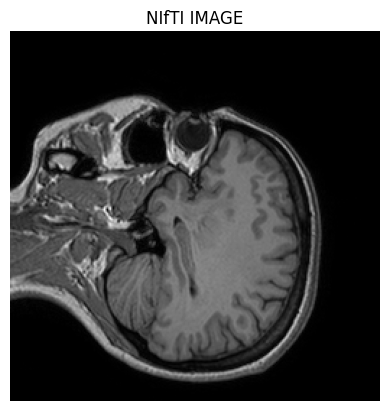

In [14]:
plt.axis("off")
plt.title("NIfTI IMAGE")
plt.imshow(img_data[:,:,100],cmap='gray')

### The Affine Matrix
Each nifti file contains, in addition to the (meta)data, als an affine matrix, which relates the position of the image coordinates to real word coordinates.
Suppose you were given a nifti file. You have no idea whether it’s even a brain scan, so you decide to plot three slices - one from each of the three axes. You pick slice 70, 100 , and again 100 .

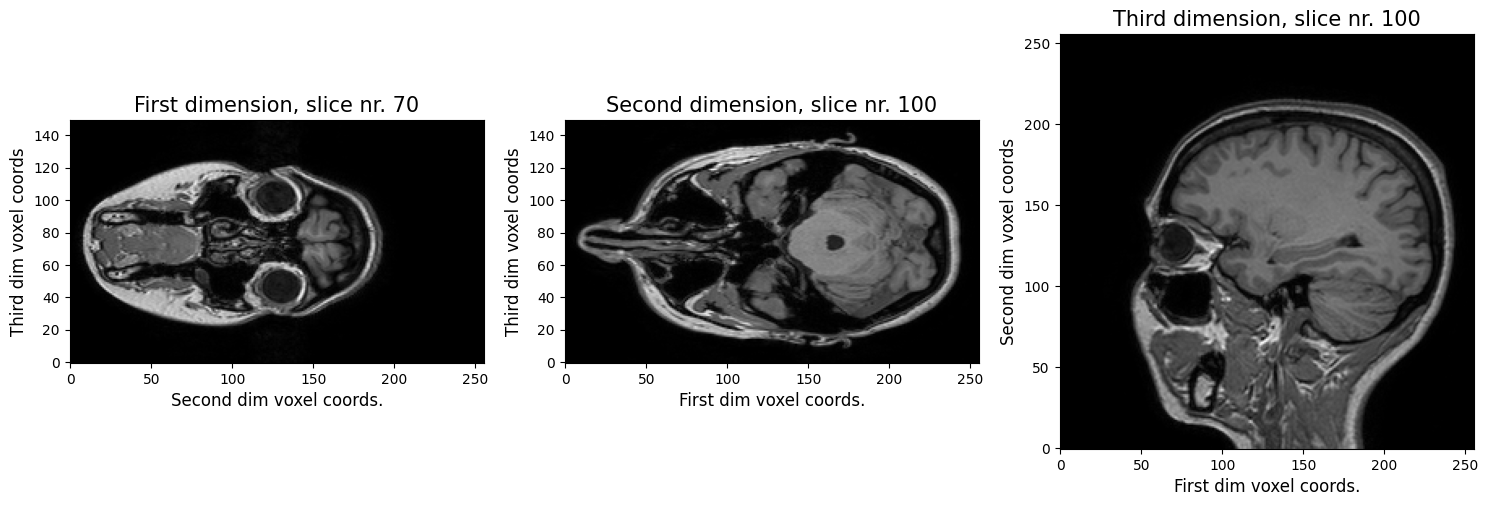

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(img_data[69, :, :].T, origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

ax[1].imshow(img_data[:, 99, :].T, origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)

ax[2].imshow(img_data[:, :, 99].T, origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)

fig.tight_layout()

In [13]:
np.set_printoptions(suppress=True, precision=3)  # suppresses scientific notation
A = img.affine
print(A)

[[   0.       0.       1.2    -88.64 ]
 [  -0.93     0.116    0.     116.532]
 [   0.116    0.93    -0.    -112.114]
 [   0.       0.       0.       1.   ]]


## ABOUT THE DATASET

In this project we have collected nearly 600 MR images from normal, healthy subjects. The MR image acquisition protocol for each subject includes T1 Images

The data has been collected at three different hospitals in London:

    Hammersmith Hospital using a Philips 3T system (details of scanner parameters)
    Guy’s Hospital using a Philips 1.5T system (details of scanner parameters)
    Institute of Psychiatry using a GE 1.5T system (details of the scan parameters not available at the moment)

The data has been collected as part of the project:
IXI – Information eXtraction from Images (EPSRC GR/S21533/02)

Reference Link - https://brain-development.org/ixi-dataset/


# REFERENCES

- https://www.sciencedirect.com/science/article/pii/S1053811923002719
- https://www.ajronline.org/doi/10.2214/AJR.07.3933
- https://case.edu/med/neurology/NR/MRI%20Basics.htm
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5832348/
- https://lukas-snoek.com/NI-edu/fMRI-introduction/week_1/python_for_mri.html